Name: Haris Zahid

Student Number: 500845895

Cites: https://benslack19.github.io/ML-logistic-regression-in-python-on-neuronal-classification/


Percentage of class 0: 65.37
Percentage of class 1: 34.63
Number of missing values: 0
Number of categorical variables: Famhist


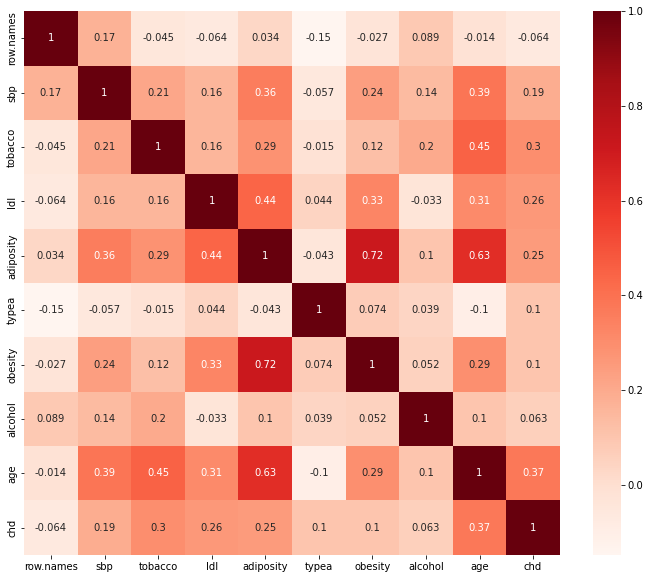

     row.names  sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
0            1  160    12.00   5.73      23.11     49    25.30    97.20   52   
1            2  144     0.01   4.41      28.61     55    28.87     2.06   63   
2            3  118     0.08   3.48      32.28     52    29.14     3.81   46   
3            4  170     7.50   6.41      38.03     51    31.99    24.26   58   
4            5  134    13.60   3.50      27.78     60    25.99    57.34   49   
..         ...  ...      ...    ...        ...    ...      ...      ...  ...   
457        459  214     0.40   5.98      31.72     64    28.45     0.00   58   
458        460  182     4.20   4.41      32.10     52    28.61    18.72   52   
459        461  108     3.00   1.59      15.23     40    20.09    26.64   55   
460        462  118     5.40  11.61      30.79     64    27.35    23.97   40   
461        463  132     0.00   4.82      33.41     62    14.70     0.00   46   

     chd  famhist_Absent  famhist_Prese

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

# Perform EDA
print("Percentage of class 0:", round(100*data['chd'].value_counts()[0]/len(data), 2))
print("Percentage of class 1:", round(100*data['chd'].value_counts()[1]/len(data), 2))
print("Number of missing values:", data.isnull().sum().sum())
print("Number of categorical variables: Famhist")

# Find correlation between features
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# One-Hot Encoding
data = pd.get_dummies(data, columns=['famhist'])
#data['famhist'].replace(['Absent', 'Present'], [0, 1], inplace=True)
print(data)

# Standardization
data.iloc[:, :-2] = (data.iloc[:, :-2] - data.iloc[:, :-2].mean()) / data.iloc[:, :-2].std()

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the cost function
def cost_function(X, y, theta):
    predictions = sigmoid(np.dot(X, theta))
    error = y * np.log(predictions) + (1 - y) * np.log(1 - predictions)
    cost = -np.mean(error)
    return cost

# Define the function for batch gradient descent iteration
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Split the dataset into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X)
print(y)

# Add bias term to X
X = np.hstack((np.ones((len(X), 1)), X))

# Initialize the theta coefficients
np.random.seed(0)
theta = np.random.rand(X.shape[1])


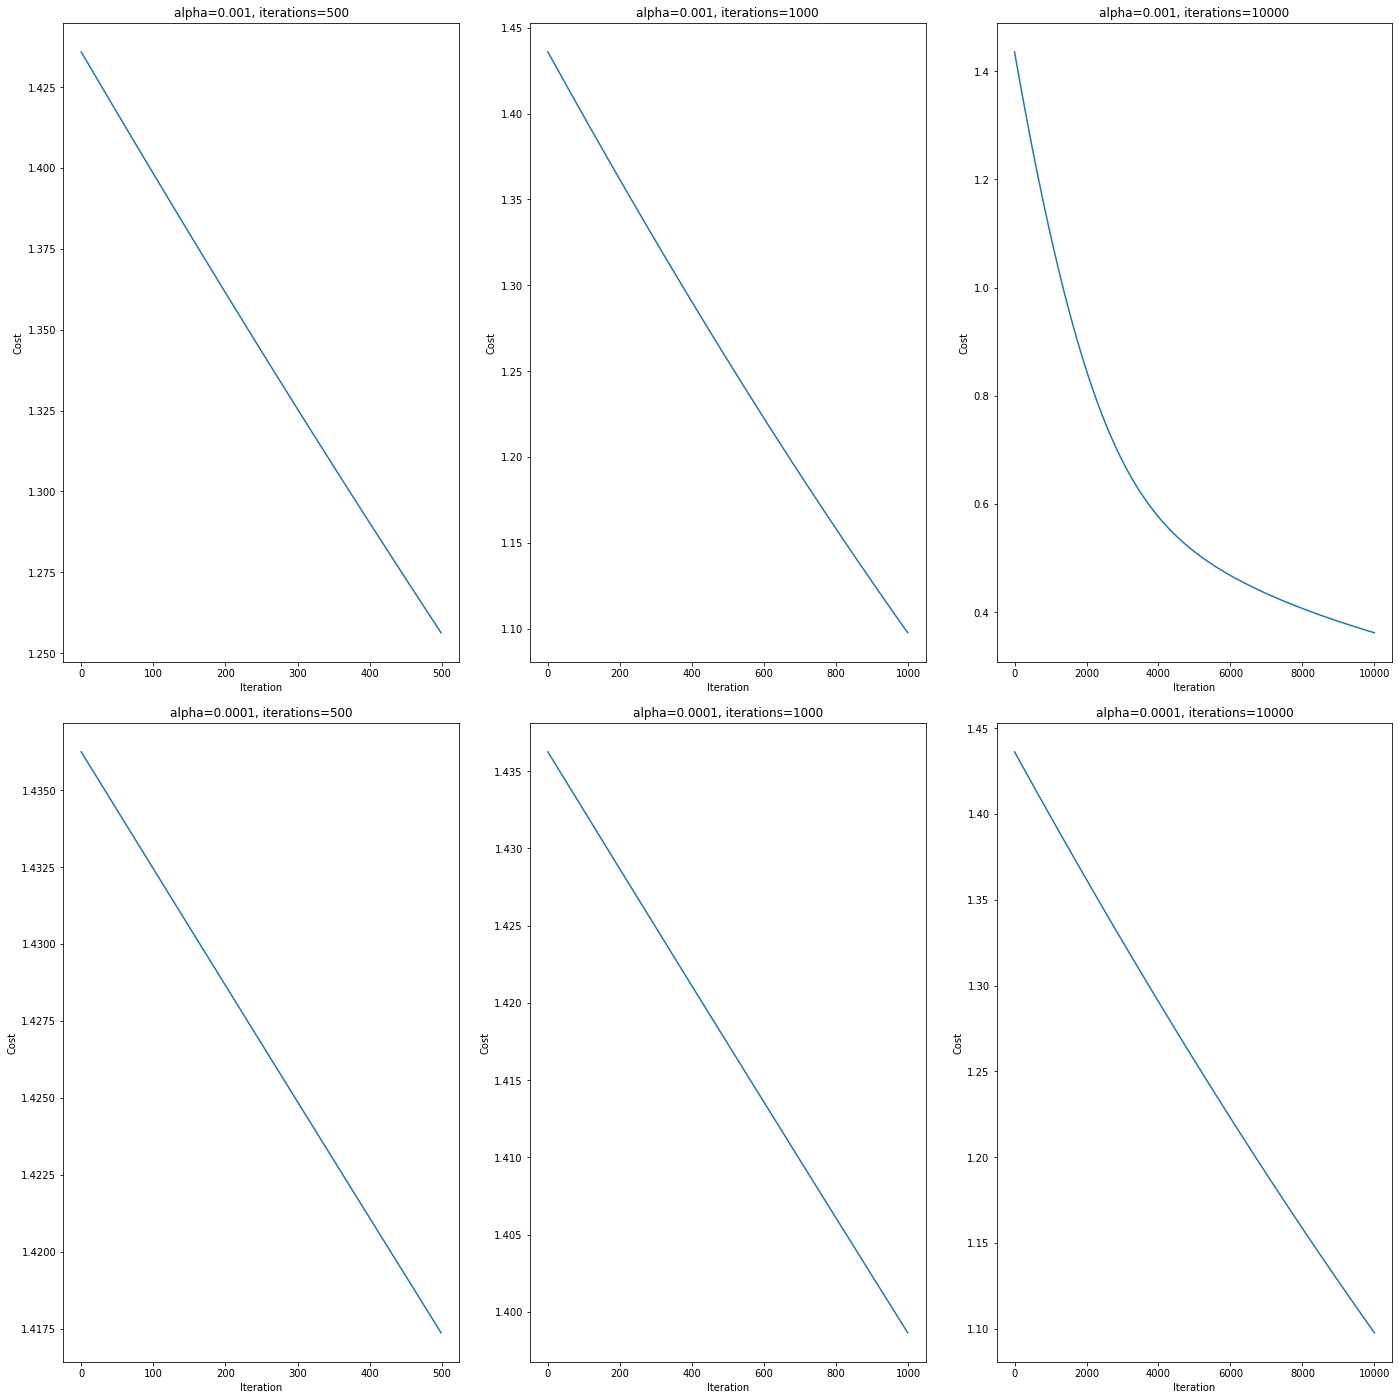

In [ ]:
def plot_learning_curves(X, y, alphas, iterations):
    fig, axs = plt.subplots(len(alphas), len(iterations), figsize=(20, 20))
    fig.tight_layout(pad=4.0)
    for i, alpha in enumerate(alphas):
        for j, iteration in enumerate(iterations):
            # Add bias term to X
            X_bias = np.hstack((np.ones((len(X), 1)), X))

            # Initialize the theta coefficients
            np.random.seed(0)
            theta = np.random.rand(X_bias.shape[1])

            # Run gradient descent algorithm
            theta, cost_history = gradient_descent(X_bias, y, theta, alpha, iteration)

            # Plot the learning curve
            axs[i, j].plot(cost_history)
            axs[i, j].set_title(f'alpha={alpha}, iterations={iteration}')
            axs[i, j].set_xlabel('Iteration')
            axs[i, j].set_ylabel('Cost')

# Define learning rates and epochs
alphas = [0.001, 0.0001]
iterations = [500, 1000, 10000]

# Plot learning curves
plot_learning_curves(X, y, alphas, iterations)

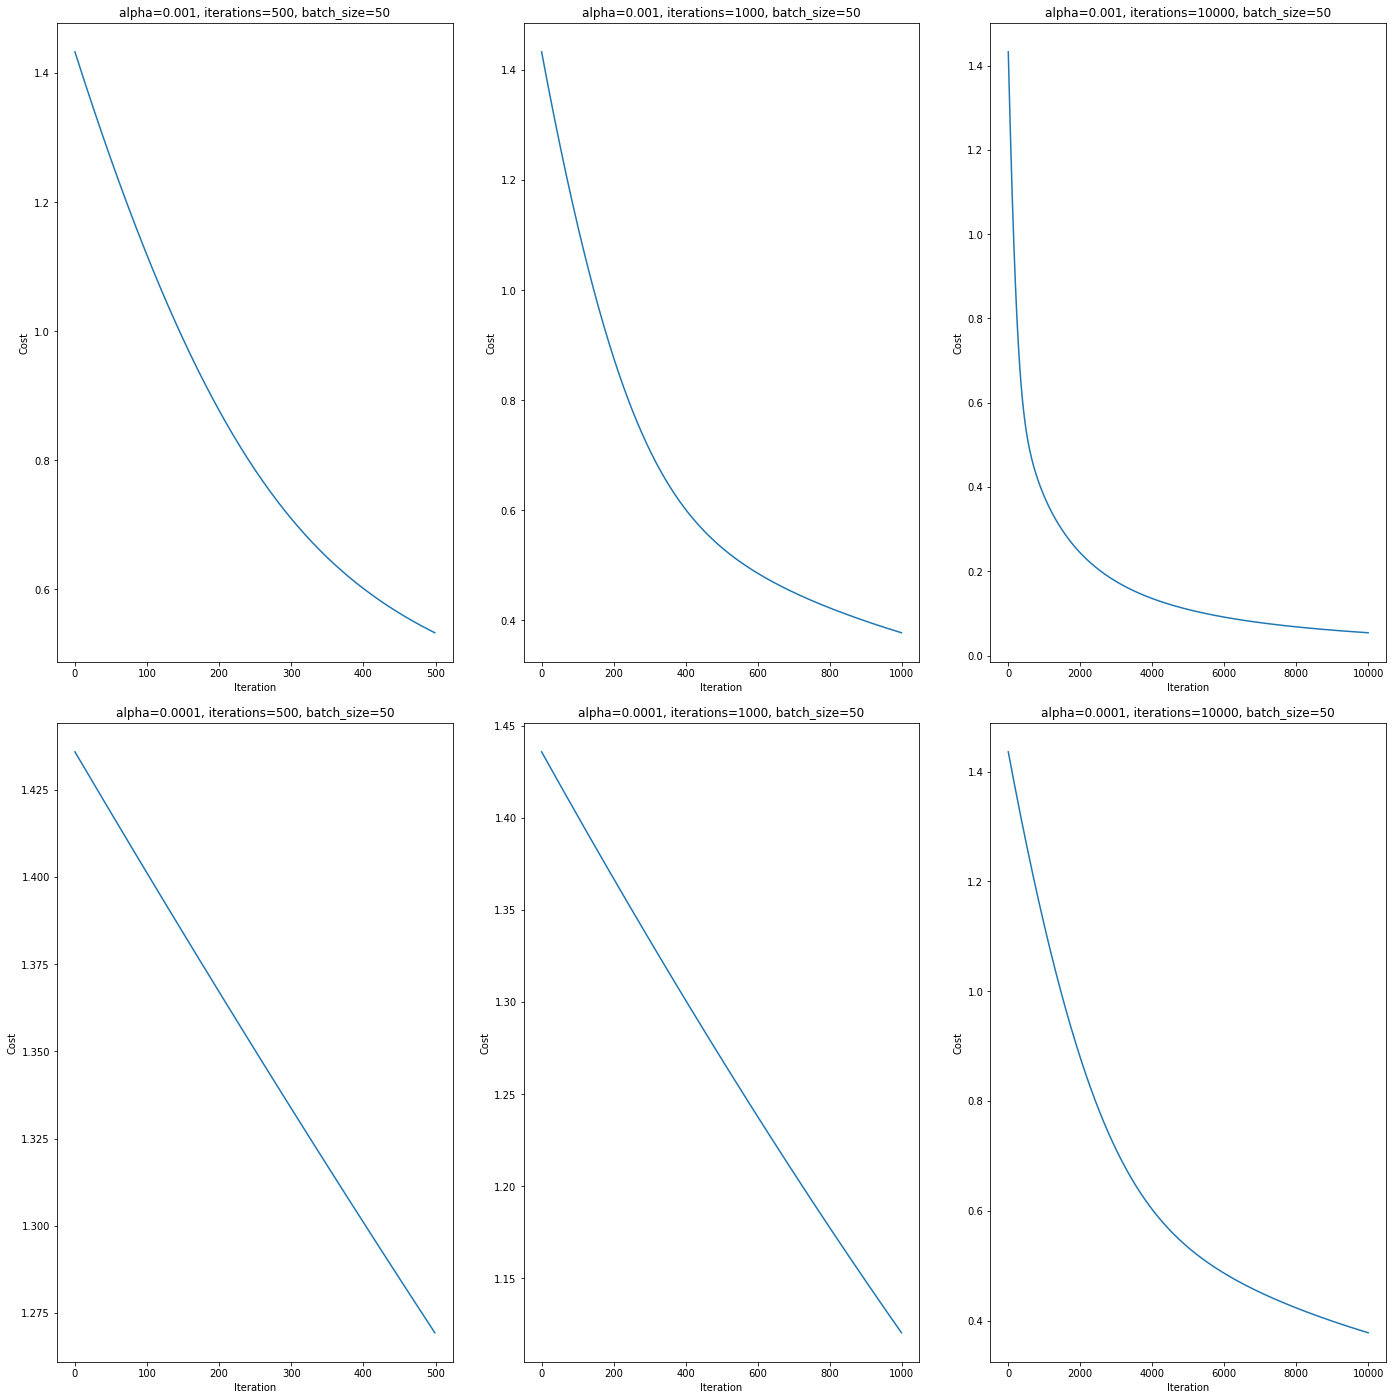

In [ ]:
def mini_batch_gradient_descent(X, y, theta, alpha, iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        for j in range(0, m, batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            predictions = sigmoid(np.dot(X_batch, theta))
            error = predictions - y_batch
            gradient = np.dot(X_batch.T, error) / batch_size
            theta -= alpha * gradient
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

def plot_learning_curves(X, y, alphas, iterations, batch_size):
    fig, axs = plt.subplots(len(alphas), len(iterations), figsize=(20, 20))
    fig.tight_layout(pad=4.0)
    for i, alpha in enumerate(alphas):
        for j, iteration in enumerate(iterations):
            # Add bias term to X
            X_bias = np.hstack((np.ones((len(X), 1)), X))

            # Initialize the theta coefficients
            np.random.seed(0)
            theta = np.random.rand(X_bias.shape[1])

            # Run mini-batch gradient descent algorithm
            theta, cost_history = mini_batch_gradient_descent(X_bias, y, theta, alpha, iteration, batch_size)

            # Plot the learning curve
            axs[i, j].plot(cost_history)
            axs[i, j].set_title(f'alpha={alpha}, iterations={iteration}, batch_size={batch_size}')
            axs[i, j].set_xlabel('Iteration')
            axs[i, j].set_ylabel('Cost')

# Define learning rates and epochs
alphas = [0.001, 0.0001]
iterations = [500, 1000, 10000]
batch_size = 50

# Plot learning curves
plot_learning_curves(X, y, alphas, iterations, batch_size)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X,y)

#print('MB GD coef: ', theta)
#print('Reg coef: ', lr.coef_)
#print('MB GD intercept: ', theta[0])
#print('Reg intercept: ', lr.intercept_)
lr.score(X, y)

1.0

Q1 and Q2:
Since the values of epoch must be higher for the cost to decline less noticeably, stopping training at 10000 epochs with a learning rate of 0.001 seems fair given the steep curve.